In [1]:
%matplotlib inline

In [2]:
plt.rc('font', size=15)
plt.rc('figure', dpi=150)

In [3]:
from treeEnt import *
from treeEnt.test_measures import *

import os
from coniii.solvers import MCH
from coniii.models import Ising
from scipy.spatial.distance import squareform

imgdr = f'{os.path.expanduser("~")}/Dropbox/Research/tree_entropy/writing/20221116_draft'

# Figure 1: Example partition

In [48]:
# load interaction graph
adj = np.zeros((11,11), dtype=int)
adj[0,1] = 1
adj[0,3] = 1
adj[0,6] = 1
adj[1,2] = 1
adj[1,3] = 1
adj[1,7] = 1
adj[2,3] = 1
adj[3,4] = 1
adj[4,5] = 1
adj[7,8] = 1
adj[7,9] = 1
adj[8,9] = 1
adj[9,10] = 1

adj += adj.T

# prep for use in TreeEntropy in Ising model class instance
model = Ising(adj.shape[0])
model.set_multipliers(J)
model.setup_sampler()

# compute partitioned graph
entropyEst = TreeEntropy(adj, model, mx_cluster_size=4)

After splitting, subgraphs are of sizes [1, 1, 1, 3, 1, 1, 3]



/home/eddie/anaconda3/envs/treee/lib/python3.10/site-packages/coniii/samplers.py:1187: UserWarning: Boost C++ implementation not available. Defaulting to slower sampling methods.
  warn("Boost C++ implementation not available. Defaulting to slower sampling methods.")


In [134]:
entropyEst.node_sets

{0: [0], 4: [4], 7: [7], 1: [1, 2, 3], 5: [5], 6: [6], 8: [8, 9, 10]}

# Figure 2: Performance

In [10]:
J_scale = [-2, -1, 0, 1, 2]
comparison = [test_n_hairy_triangles(5, j, sample_size=1_000, cond_sample_size=1_000)
              for j in J_scale]

/home/eddie/anaconda3/envs/treee/lib/python3.10/site-packages/coniii/samplers.py:1180: UserWarning: Assuming that the model is Ising.
  if iprint: warn("Assuming that the model is Ising.")
/home/eddie/anaconda3/envs/treee/lib/python3.10/site-packages/coniii/samplers.py:1180: UserWarning: Assuming that the model is Ising.
  if iprint: warn("Assuming that the model is Ising.")
/home/eddie/anaconda3/envs/treee/lib/python3.10/site-packages/coniii/samplers.py:1180: UserWarning: Assuming that the model is Ising.
  if iprint: warn("Assuming that the model is Ising.")
/home/eddie/Dropbox/Research/tree_entropy/py/treeEnt/NSB_toolbox.py:321: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  result = quad(lambda xi: integrand(xi, -exp_const), mn, mx,
/home/eddie/Dropbox/Research/tree_entropy/py/treeEnt/NSB_toolbox.py:321: IntegrationWarning: The occurrence of roundoff error is det

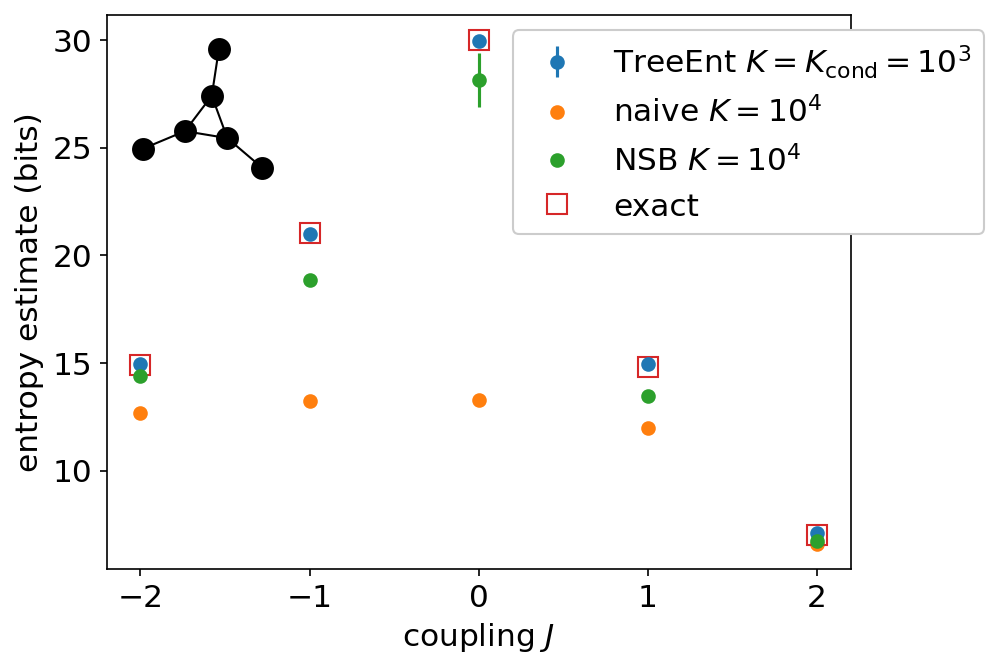

In [9]:
fig, ax = plt.subplots()

h = []
h.append(ax.errorbar(J_scale, [i[0][0] for i in comparison],
                     yerr=[i[0][1] for i in comparison],
                     fmt='o'))
h.append(ax.plot(J_scale, [i[1] for i in comparison], 'o')[0])
h.append(ax.errorbar(J_scale, [i[2][0] for i in comparison],
                     yerr=[i[2][1] for i in comparison], fmt='o')[0])
h.append(ax.plot(J_scale, [exact_hairy_triangle_entropy(j)*5 for j in J_scale], 's',
                 ms=10, mfc='none')[0])

ax.set(xlabel=r'coupling $J$', ylabel='entropy estimate (bits)')
ax.legend(h, (r'TreeEnt $K=K_{\rm cond}=10^3$', r'naive $K=10^4$', r'NSB $K=10^4$', 'exact'),
          loc=1, bbox_to_anchor=(1.2, 1), framealpha=1)

axinset = fig.add_axes([.15,.65,.15,.2])
G = nx.Graph([(0,1),(1,2),(0,2),(0,4),(1,5),(2,6)])
nx.draw(G, ax=axinset, node_size=100, node_color='black')

# fig.savefig(f'{imgdr}/performance.pdf', bbox_inches='tight')

# Figure 3: Partition examples

In [4]:
# load interaction graph
J = np.load('examples/dc_circuit.npy')
adj = (squareform(J)!=0).astype(int)

# prep for use in TreeEntropy in Ising model class instance
model = Ising(adj.shape[0])
model.set_multipliers(J)
model.setup_sampler()

# compute partitioned graph
entropyEst = TreeEntropy(adj, model, mx_cluster_size=15)

rev_node_sets = {}
for k, v in entropyEst.node_sets.items():
    for v_ in v:
        rev_node_sets[v_] = k
    
color_map = {}
for i, k in enumerate(entropyEst.node_sets.keys()):
    color_map[k] = f'C{i}'

After splitting, subgraphs are of sizes [19, 4, 14, 10]



/home/eddie/anaconda3/envs/treee/lib/python3.10/site-packages/coniii/samplers.py:1187: UserWarning: Boost C++ implementation not available. Defaulting to slower sampling methods.
  warn("Boost C++ implementation not available. Defaulting to slower sampling methods.")
/home/eddie/Dropbox/Research/tree_entropy/py/treeEnt/measures.py:60: UserWarning: Some subgraphs are beyond desired threshold size.
  warn("Some subgraphs are beyond desired threshold size.")


In [53]:
# load interaction graph
J = np.load('examples/dc_circuit.npy')
adj = (squareform(J)!=0).astype(int)

# prep for use in TreeEntropy in Ising model class instance
model = Ising(adj.shape[0])
model.set_multipliers(J)
model.setup_sampler()

# compute partitioned graph
entropyEst = TreeEntropy(adj, model, mx_cluster_size=15)

After splitting, subgraphs are of sizes [19, 4, 14, 10]



/home/eddie/anaconda3/envs/treee/lib/python3.10/site-packages/coniii/samplers.py:1187: UserWarning: Boost C++ implementation not available. Defaulting to slower sampling methods.
  warn("Boost C++ implementation not available. Defaulting to slower sampling methods.")
/home/eddie/Dropbox/Research/tree_entropy/py/treeEnt/measures.py:87: UserWarning: Some subgraphs are beyond desired threshold size.
  self.contracted_G, self.node_sets = self.contract_G()


In [42]:
rev_node_sets = {}
for k, v in entropyEst.node_sets.items():
    for v_ in v:
        rev_node_sets[v_] = k
    
color_map = {}
for i, k in enumerate(entropyEst.node_sets.keys()):
    color_map[k] = f'C{i}'

(-0.9220037017603357,
 1.1826338359138782,
 -0.3636666670382533,
 0.6738401246428245)

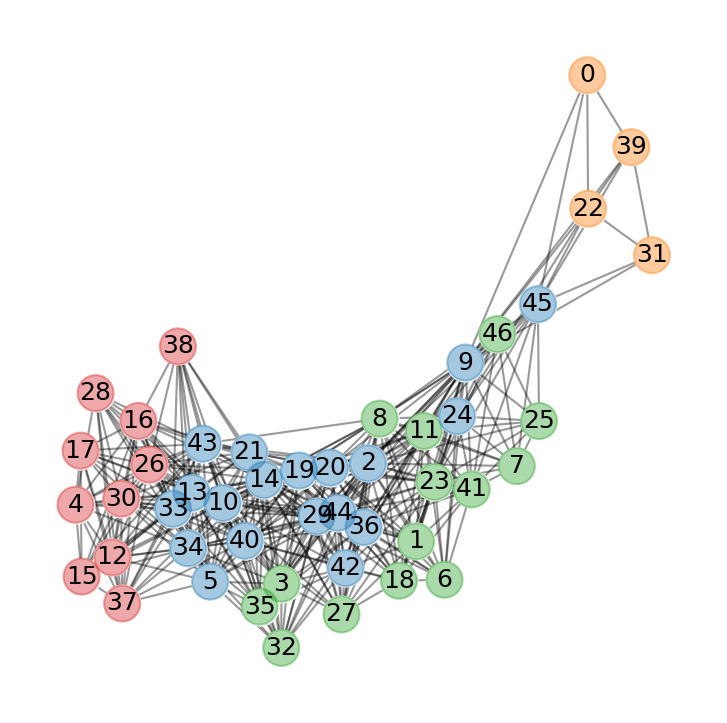

In [5]:
fig, ax = plt.subplots(figsize=(6,6))

pos = nx.spring_layout(entropyEst.G, k=2/np.sqrt(len(entropyEst.G)), seed=5)
nx.draw_networkx_edges(entropyEst.G, pos, alpha=.4)
nx.draw_networkx_nodes(entropyEst.G, pos, node_color='white')
nx.draw_networkx_nodes(entropyEst.G, pos, 
                       node_color=[color_map[rev_node_sets[n]] for n in entropyEst.G.nodes], 
                       alpha=.4)
nx.draw_networkx_labels(entropyEst.G, pos);
plt.gca().axis('off')

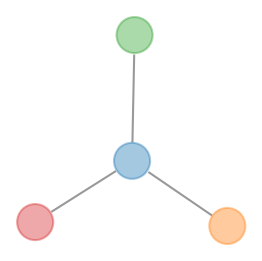

In [6]:
fig, ax = plt.subplots(figsize=(2,2))

G = entropyEst.contracted_G[0]

pos = nx.spring_layout(G, k=1/np.sqrt(len(G)), seed=6)
nx.draw_networkx_edges(G, pos, alpha=.4)
nx.draw_networkx_nodes(G, pos, node_color='white')
nx.draw_networkx_nodes(G, pos, 
                       node_color=[color_map[n] for n in G.nodes],
                       alpha=.4)
plt.gca().axis('off');

# Figure 4: Free energy

In [7]:
# pre-computed circuit court entropy estimates
circuit_court_H = {0:(19.75058898826454, 0.060153698986527115),
                   1:(11.003359939035489, 0.03397299160402109),
                   2:(19.901666388147145, 0.05616683187392667)}

def load_and_plot(circuit_no, fname, sample_size=100_000):
    # load interaction graph
    J = np.load(f'examples/{fname}')
    adj = (squareform(J)!=0).astype(int)

    # prep for use in TreeEntropy in Ising model class instance
    model = Ising(adj.shape[0])
    model.set_multipliers(np.concatenate((np.zeros(model.n),J)))
    model.setup_sampler()
    model.generate_sample(model.n*100, model.n*1000, sample_size=sample_size)

    u_sample, p_sample = np.unique(model.sample,
                                   axis=0, return_counts=True)
    p_sample = p_sample/p_sample.sum()

    E = model.calc_e(model.sample, model.multipliers)
    logZ = -E.mean() + circuit_court_H[circuit_no][0] * np.log(2) # convert entropy from bits to nats

    p_model = np.exp(-model.calc_e(u_sample, model.multipliers) - logZ)
    err_factor = np.exp(circuit_court_H[circuit_no][1] * np.log(2))
    
    fig, ax = plt.subplots(figsize=(4.4,4))
    ax.loglog(p_sample, p_model, '.', ms=4)
    ax.loglog(*([[p_sample.min(),p_sample.max()]]*2), 'k-', lw=1)
    ax.fill_between([p_sample.min(),p_sample.max()],
                    [p_sample.min()/err_factor,p_sample.max()/err_factor],
                    [p_sample.min()*err_factor,p_sample.max()*err_factor],
                    color='k', alpha=.3, linewidth=0)
    ax.set(xlabel=r'MC sample $p(s)$', ylabel=r'TreeEnt $p(s)$')
    return fig

/home/eddie/anaconda3/envs/treee/lib/python3.10/site-packages/coniii/samplers.py:1180: UserWarning: Assuming that the model is Ising.
  if iprint: warn("Assuming that the model is Ising.")


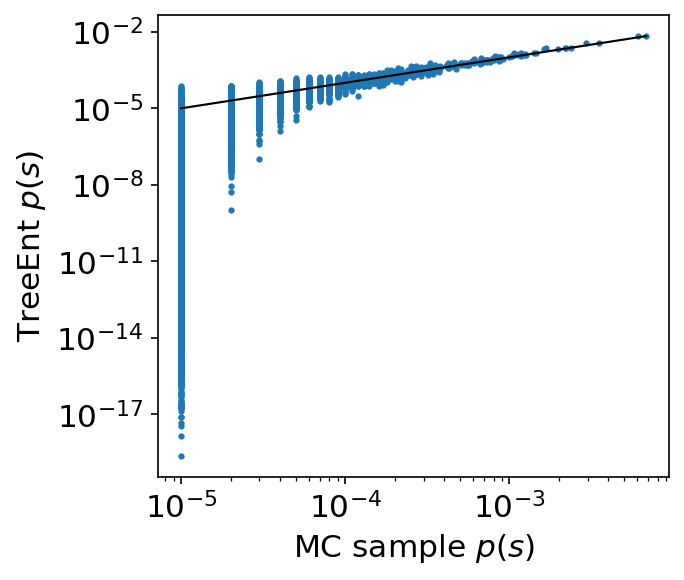

In [29]:
fig = load_and_plot(0, 'dc_circuit.npy')
fig.savefig(f'{imgdr}/dc_p.png', bbox_inches='tight', dpi=150)

/home/eddie/anaconda3/envs/treee/lib/python3.10/site-packages/coniii/samplers.py:1180: UserWarning: Assuming that the model is Ising.
  if iprint: warn("Assuming that the model is Ising.")


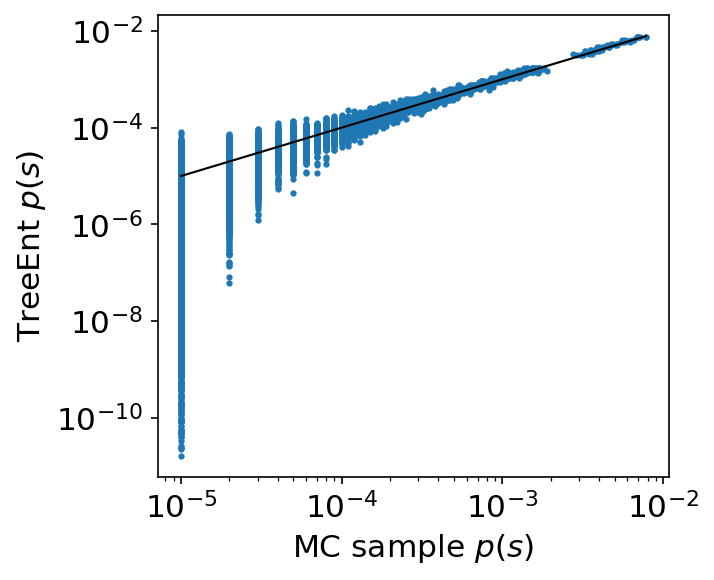

In [28]:
fig = load_and_plot(1, 'first_circuit.npy')
fig.savefig(f'{imgdr}/first_p.png', bbox_inches='tight', dpi=150)

# Figure 6: pseudo KL divergence

In [67]:
with open('examples/0_dkl.p', 'rb') as f:
    dkl0 = pickle.load(f)['dkl']
with open('examples/1_dkl.p', 'rb') as f:
    dkl1 = pickle.load(f)['dkl']

with open('examples/0_free_energy.p', 'rb') as f:
    free_energy0 = pickle.load(f)['free_energy']
with open('examples/1_free_energy.p', 'rb') as f:
    free_energy1 = pickle.load(f)['free_energy']

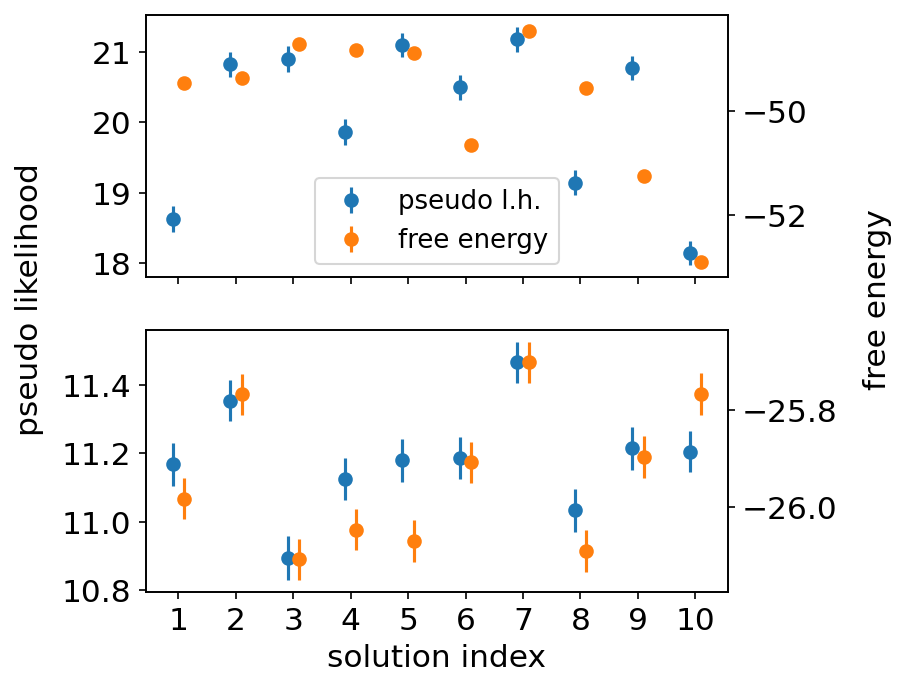

In [81]:
fig, ax = plt.subplots(figsize=(5,5), nrows=2, sharex=True)

h = []
h.append(ax[0].errorbar(arange(1,len(dkl0)+1)-.1, list(zip(*dkl0))[0], 
               yerr=list(zip(*dkl0))[1], fmt='o'))
ax[1].errorbar(arange(1,len(dkl1)+1)-.1, list(zip(*dkl1))[0], 
               yerr=list(zip(*dkl1))[1], fmt='o')
ax[1].set(xticks=range(1,11), xlabel='solution index');

axb = ax[0].twinx(), ax[1].twinx()
h.append(axb[0].errorbar(arange(1,len(free_energy0)+1)+.1, list(zip(*free_energy0))[0], 
                yerr=list(zip(*free_energy0))[1], fmt='o', c='C1'))
axb[1].errorbar(arange(1,len(free_energy1)+1)+.1, list(zip(*free_energy1))[0], 
                yerr=list(zip(*free_energy1))[1], fmt='o', c='C1')
ax[0].legend(h, ('pseudo l.h.', 'free energy'), fontsize='small', loc='lower center')

fig.text(-.05, .5, 'pseudo likelihood', va='center', rotation=90)
fig.text(1.08, .5, 'free energy', va='center', rotation=90)

fig.savefig(f'{imgdr}/pseudo_dkl.pdf', bbox_inches='tight')